

# RNN for Time Series

RNNs are used for sequence modeling. This tutorial will look at a time series data to be modeled and predicted using RNNs.

In [45]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt


## Data

We will use retail data for time-series modeling.

Link to the dataset:
 https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at:
https://www.census.gov/retail/marts/about_the_surveys.html

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted
Frequency:  Monthly

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, November 16, 2019.

https://fred.stlouisfed.org/series/RSCCASN

# Read data first -  Use index_col = 'DATE' and 'parse_dates = True' as a parameter.

In [57]:
df = pd.read_csv('RSCCASN.csv',index_col='DATE',parse_dates=True)

Does the sales column has any name?

If no, set the name of the colum as 'Sales'.

In [58]:
df.head()

,RSCCASN
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


In [59]:
# Set name of column as 'Sales'. Use - df.columns

df.columns = ['Sales']

df.head()

,Sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0


Plot your data - Year vs Sales

<Axes: xlabel='DATE'>

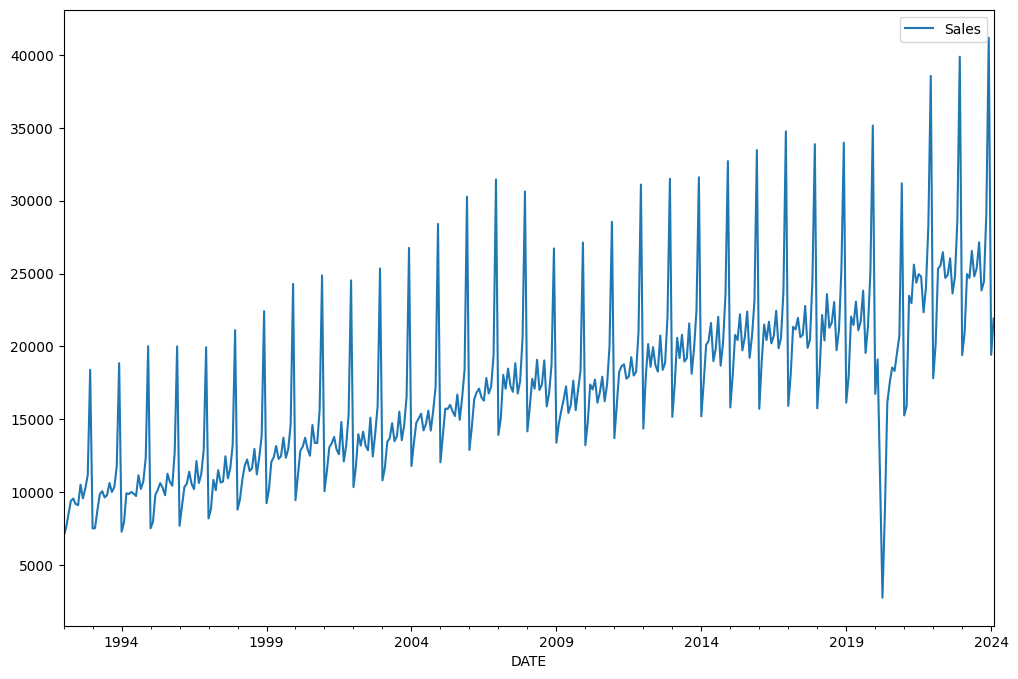

In [60]:
#Plot the data - Year vs Sales

df.plot(figsize=(12,8))

## Next we will do Train Test Split.

We will use last 1.5 year (18 month) samples for testing. Rest is for training.

In [61]:
# Assign variable test size = 18

test_size = 18

In [62]:
# Store length of data in variable length.

data_length = len(df)
data_length

386

In [63]:
len(df)- 18

368

In [65]:
# store training size in varialable train_size
# (Remember training size = total size - test_size)

train_size = data_length- test_size
train_size

368

In [66]:
# find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

test_index =  train_size

Now, we will find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

Next, we will separate train and test datasets.

In [69]:
# separate train and test datasets.

train = df.iloc[:test_index]
test = df.iloc[test_index:]

# Print the size of the train data
# Print the size of the test data

print(train.size)
print(test.size)

368
18


In [70]:
# Print the train data

train

,Sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0
...,...
2022-04-01,25539.0
2022-05-01,26470.0
2022-06-01,24701.0


In [72]:
# Print the test data

test

,Sales
DATE,
2022-09-01,23629.0
2022-10-01,24787.0
2022-11-01,28645.0
2022-12-01,39883.0
2023-01-01,19405.0
2023-02-01,20937.0
2023-03-01,24963.0
2023-04-01,24700.0
2023-05-01,26557.0


## In Neural Networks, we need to Scale Data between 0-1

*   List item
*   List item



In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [75]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [76]:
#
# Check if the data has been scaled properly
#

# Print the minimum and maximum values of the scaled train and test data
print("Min and Max values of Scaled Train Data:")
print("Min:", scaled_train.min(axis=0))
print("Max:", scaled_train.max(axis=0))

print("\nMin and Max values of Scaled Test Data:")
print("Min:", scaled_test.min(axis=0))
print("Max:", scaled_test.max(axis=0))

Min and Max values of Scaled Train Data:
Min: [0.]
Max: [1.]

Min and Max values of Scaled Test Data:
Min: [0.46501173]
Max: [1.07324361]


# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

# We will use 12 months as input and then predict the next month out


In [77]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [78]:
X, y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11688819 0.13325142 0.15980677 0.18566402 0.19004803 0.17954875
 0.17734279 0.21671507 0.19046688 0.20948285 0.23553557 0.43680889]
Predict this y: 
 [[0.1326371]]


### Create the Model

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [80]:
# We're only using one feature in our time series
n_features = 1

# Define your own models.

Use 1. SimpleRNN, LSTM, or GRU neural network.

APIs:
https://keras.io/api/layers/recurrent_layers/

In [81]:
# define model

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
model.compile(optimizer='adam', loss='mse')

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. Review video for more info on this.

In [83]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

# Your code to create an object early-stop.
early_stop = EarlyStopping(monitor='val_loss', patience=5)

Now, fit your model.

In [85]:
# fit model
# IGNORE THE WARNING

history =  model.fit(generator,  epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30
356/356 [==============================] - 10s 20ms/step - loss: 0.0210 - val_loss: 0.0587
Epoch 2/30
356/356 [==============================] - 7s 21ms/step - loss: 0.0134 - val_loss: 0.0266
Epoch 3/30
356/356 [==============================] - 6s 18ms/step - loss: 0.0104 - val_loss: 0.0164
Epoch 4/30
356/356 [==============================] - 7s 21ms/step - loss: 0.0081 - val_loss: 0.0058
Epoch 5/30
356/356 [==============================] - 7s 18ms/step - loss: 0.0059 - val_loss: 0.0069
Epoch 6/30
356/356 [==============================] - 7s 20ms/step - loss: 0.0065 - val_loss: 0.0043
Epoch 7/30
356/356 [==============================] - 7s 20ms/step - loss: 0.0049 - val_loss: 0.0251
Epoch 8/30
356/356 [==============================] - 6s 18ms/step - loss: 0.0056 - val_loss: 0.0042
Epoch 9/30
356/356 [==============================] - 7s 20ms/step - loss: 0.0050 - val_loss: 0.0137
Epoch 10/30
356/356 [==============================] - 7s 19ms/step - loss: 0.0040 - val_l

In [88]:
# Get Losses from dataframe (hint - model.history.history)- See previous week tutorial.
losses = pd.DataFrame(model.history.history)

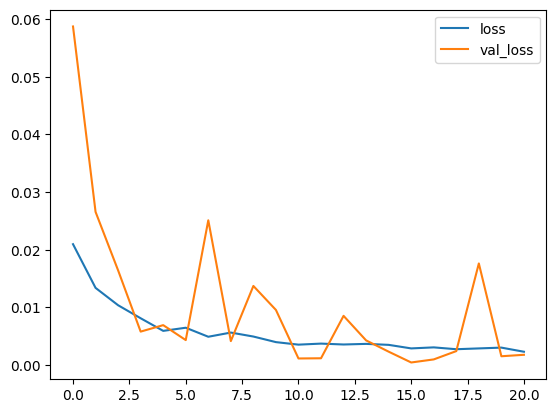

In [89]:
# Plot losses in the dataframe.
losses.plot();

<ipython-input-92-0c9b6b117c08>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
Exception ignored in: <function _xla_gc_callback at 0x7cf388d3f250>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


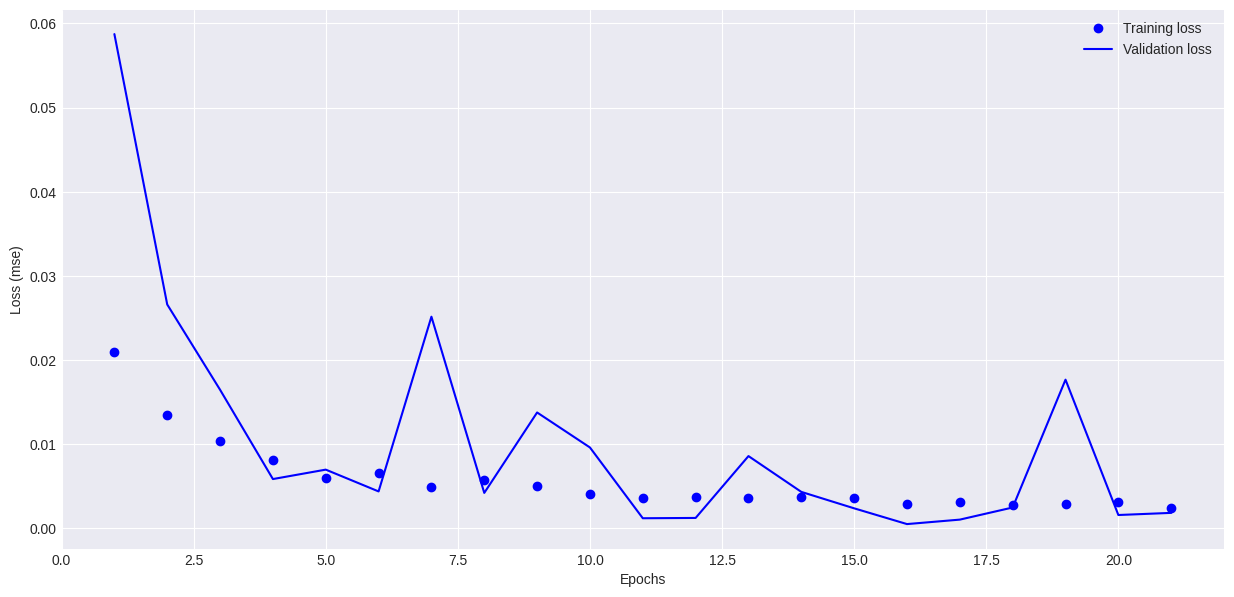

In [92]:
# printing Loss for the neural network training process

history_dict = history.history
# plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

## Evaluate on Test Data

In [93]:
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.54716296],
       [0.59505194],
       [0.7145091 ],
       [1.        ],
       [0.42066905],
       [0.48587066],
       [0.63093377],
       [0.6362951 ],
       [0.66229197],
       [0.61289512],
       [0.61856361],
       [0.65053613]])

In [94]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
model.predict(first_eval_batch)
scaled_test[0]

1/1 [==============================] - 0s 38ms/step


array([[[0.54716296],
        [0.59505194],
        [0.7145091 ],
        [1.        ],
        [0.42066905],
        [0.48587066],
        [0.63093377],
        [0.6362951 ],
        [0.66229197],
        [0.61289512],
        [0.61856361],
        [0.65053613]]])

In [95]:
first_eval_batch

array([[[0.54716296],
        [0.59505194],
        [0.7145091 ],
        [1.        ],
        [0.42066905],
        [0.48587066],
        [0.63093377],
        [0.6362951 ],
        [0.66229197],
        [0.61289512],
        [0.61856361],
        [0.65053613]]])

In [96]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 22ms/step


array([[0.5463333]], dtype=float32)

In [97]:
scaled_test[0]

array([0.58296102])

#### Try predicting the series!

In [99]:
for i in range(len(test)):

    print(i)

    # get prediction 1 time stamp ahead ([0] is for
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    print(current_pred)

    # store prediction
    test_predictions.append(current_pred)
    print(test_predictions)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    print(current_batch)

0
1/1 [==============================] - 0s 35ms/step
[0.43936655]
[array([0.5463333], dtype=float32), array([0.56799364], dtype=float32), array([0.6511676], dtype=float32), array([0.97654456], dtype=float32), array([0.42547026], dtype=float32), array([0.4516058], dtype=float32), array([0.5015666], dtype=float32), array([0.53629124], dtype=float32), array([0.5761624], dtype=float32), array([0.5595864], dtype=float32), array([0.56493866], dtype=float32), array([0.59528655], dtype=float32), array([0.5207361], dtype=float32), array([0.53251433], dtype=float32), array([0.60494906], dtype=float32), array([0.9342201], dtype=float32), array([0.39783853], dtype=float32), array([0.4192295], dtype=float32), array([0.43936655], dtype=float32)]
[[[0.53629124]
  [0.5761624 ]
  [0.55958641]
  [0.56493866]
  [0.59528655]
  [0.5207361 ]
  [0.53251433]
  [0.60494906]
  [0.93422008]
  [0.39783853]
  [0.41922951]
  [0.43936655]]]
1
1/1 [==============================] - 0s 43ms/step
[0.46741688]
[array([

## Inverse Transformations and Compare

In [100]:
true_predictions = scaler.inverse_transform(test_predictions)

In [102]:
true_predictions

array([[22317.28860474],
       [23092.9882679 ],
       [26071.61307216],
       [37724.01374698],
       [17988.94105017],
       [18924.9067955 ],
       [20714.10268092],
       [21957.66194582],
       [23385.52779222],
       [22791.90836287],
       [22983.58345079],
       [24070.40186191],
       [21400.60115194],
       [21822.40331936],
       [24416.43563294],
       [36208.28934765],
       [16999.3935411 ],
       [17765.44712067],
       [18486.59486187],
       [19491.13339663],
       [20645.84367204],
       [20817.59476256],
       [20986.70326591],
       [21887.11895609],
       [20105.80280459],
       [20347.68704903],
       [22832.05946541],
       [34221.56967568],
       [15794.42714882],
       [16689.81808114],
       [17256.55804431],
       [18027.2169404 ],
       [18820.34529853],
       [19143.36102521],
       [19235.44707727],
       [19756.14881718]])

In [101]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

ValueError: Length of values (36) does not match length of index (18)

# Check and plot predictions

In [103]:
# Print the test variable.
test

,Sales
DATE,
2022-09-01,23629.0
2022-10-01,24787.0
2022-11-01,28645.0
2022-12-01,39883.0
2023-01-01,19405.0
2023-02-01,20937.0
2023-03-01,24963.0
2023-04-01,24700.0
2023-05-01,26557.0


<Axes: xlabel='DATE'>

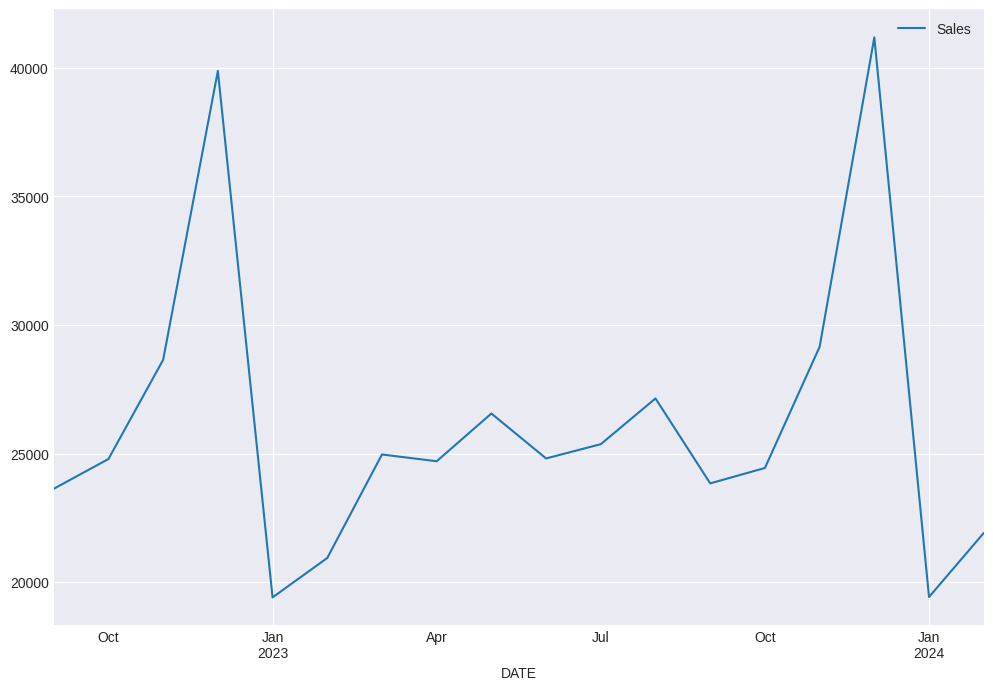

In [104]:
test.plot(figsize=(12,8))

In [ ]:
# Your code to plot actual sales and predictions.



# Retrain and Forecasting

In [105]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [106]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data,
                                scaled_full_data, length=length, batch_size=1)

In [107]:
#
# Use any neural network model based on RNN
#
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))

In [108]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
model.compile(optimizer='adam', loss='mse')

In [110]:
early_stop = EarlyStopping(monitor='loss',patience=5)

In [111]:
# fit model
# IGNORE THE WARNING

history_2 =  model.fit(generator, epochs=30, callbacks=[early_stop])

Epoch 1/30
374/374 [==============================] - 8s 17ms/step - loss: 0.0178
Epoch 2/30
374/374 [==============================] - 7s 19ms/step - loss: 0.0123
Epoch 3/30
374/374 [==============================] - 6s 16ms/step - loss: 0.0078
Epoch 4/30
374/374 [==============================] - 6s 16ms/step - loss: 0.0084
Epoch 5/30
374/374 [==============================] - 7s 19ms/step - loss: 0.0062
Epoch 6/30
374/374 [==============================] - 6s 16ms/step - loss: 0.0052
Epoch 7/30
374/374 [==============================] - 7s 19ms/step - loss: 0.0044
Epoch 8/30
374/374 [==============================] - 7s 18ms/step - loss: 0.0040
Epoch 9/30
374/374 [==============================] - 7s 18ms/step - loss: 0.0046
Epoch 10/30
374/374 [==============================] - 7s 20ms/step - loss: 0.0038
Epoch 11/30
374/374 [==============================] - 6s 17ms/step - loss: 0.0034
Epoch 12/30
374/374 [==============================] - 7s 19ms/step - loss: 0.0034
Epoch 13/30
3

<ipython-input-112-4b14c8a28f51>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


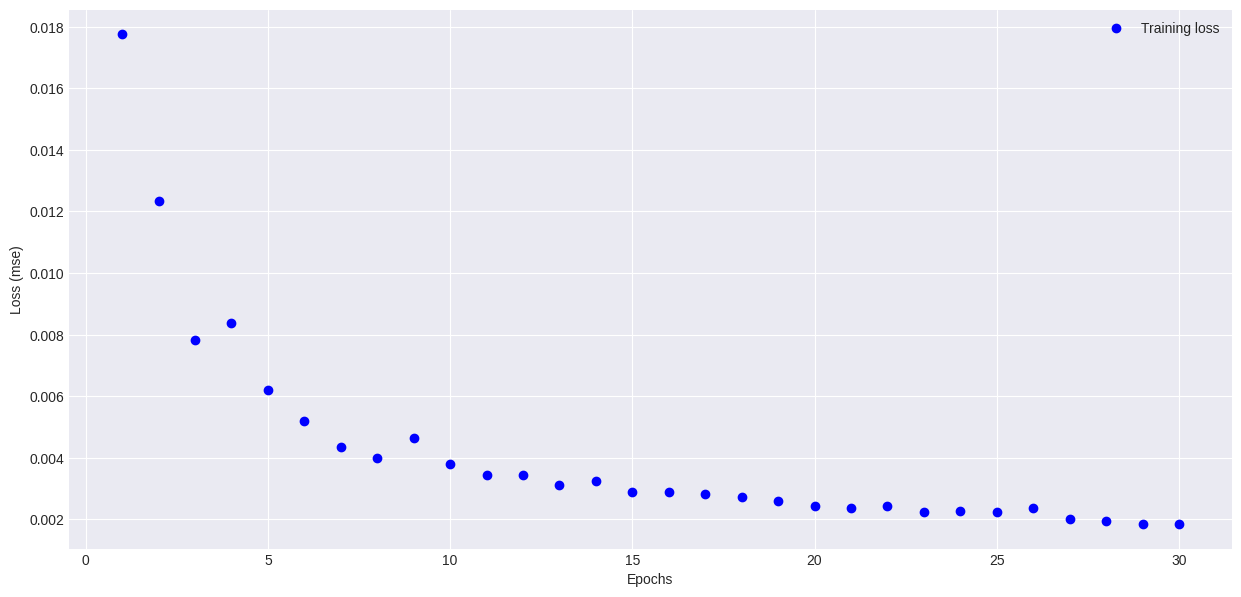

In [112]:
# printing Loss for the neural network training process

history_dict = history_2.history
plt.style.use('seaborn-darkgrid')

acc_values = history_dict['loss']
#val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
#plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

In [114]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):

    # get prediction 1 time stamp ahead ([0] is for
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    forecast.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 36ms/step


In [115]:
forecast = scaler.inverse_transform(forecast)

In [116]:
forecast

array([[23365.64221692],
       [24131.51008964],
       [25969.28219199],
       [25552.6179142 ],
       [26035.64571023],
       [27544.63983703],
       [25716.36439896],
       [25778.93053222],
       [29042.33146048],
       [41690.41971064],
       [19384.62304497],
       [21695.67866993]])

### Creating new timestamp index with pandas.

In [117]:
df

,Sales
DATE,
1992-01-01,6938.0
1992-02-01,7524.0
1992-03-01,8475.0
1992-04-01,9401.0
1992-05-01,9558.0
...,...
2023-10-01,24438.0
2023-11-01,29150.0
2023-12-01,41187.0


In [118]:
forecast_index = pd.date_range(start='2020-02-01',periods=periods,freq='MS')

In [119]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [120]:
forecast_df

,Forecast
2020-02-01,23365.642217
2020-03-01,24131.510090
2020-04-01,25969.282192
2020-05-01,25552.617914
2020-06-01,26035.645710
2020-07-01,27544.639837
2020-08-01,25716.364399
2020-09-01,25778.930532
2020-10-01,29042.331460
2020-11-01,41690.419711


<Axes: xlabel='DATE'>

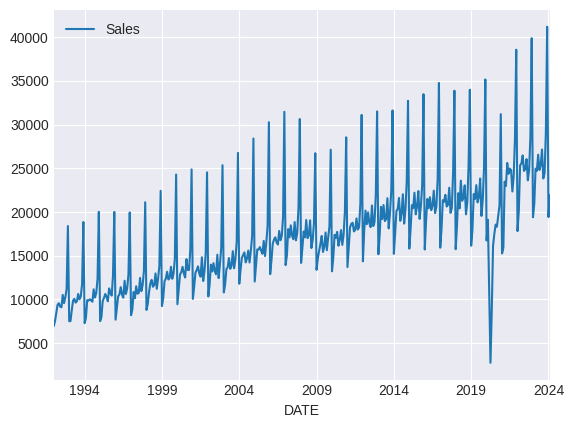

In [123]:
# Plot sales - Values in dataframe
df.plot()

<Axes: >

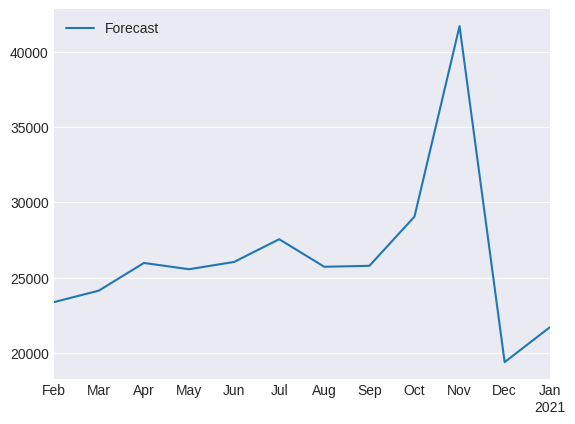

In [124]:
# Plot forecast - Values in forecast_df
forecast_df.plot()

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

<Axes: xlabel='DATE'>

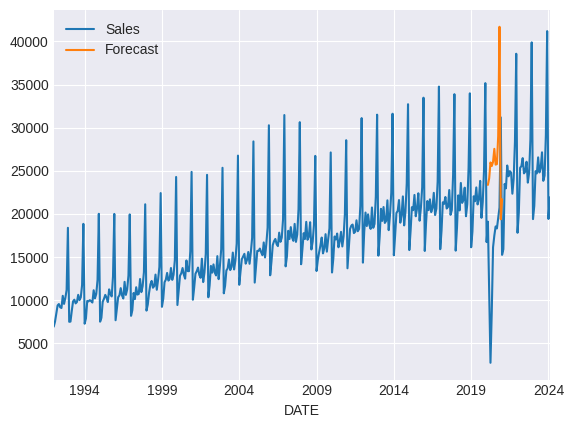

In [125]:
ax = df.plot()
forecast_df.plot(ax=ax)

(576.0, 612.0)

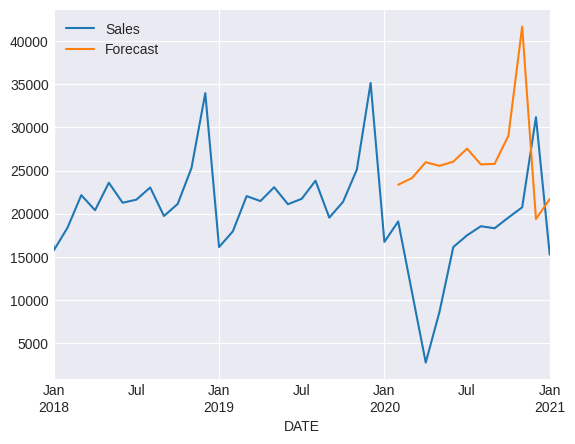

In [126]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2021-01-01')

# Try the same example with a LSTM and GRU!
Hint: Use LSTM instead of SimpleRNN!